**TextClassification**

Text classification is a supervised learning task. In supervised learning, the algorithm is trained on a labeled dataset, meaning each input (in this case, a text document) is associated with a corresponding output label (the category or class it belongs to).

**Importing all the required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Reading the Dataset

In [ ]:
df=pd.read_csv("/content/Emotions_training.csv")
df.head(3)
df.shape

(16000, 2)

In [ ]:
word_count = df['text'].str.split().apply(len).sum()
print("Total number of words in the column:", word_count)

Total number of words in the column: 306661


Check whether the dataset is balanced or not

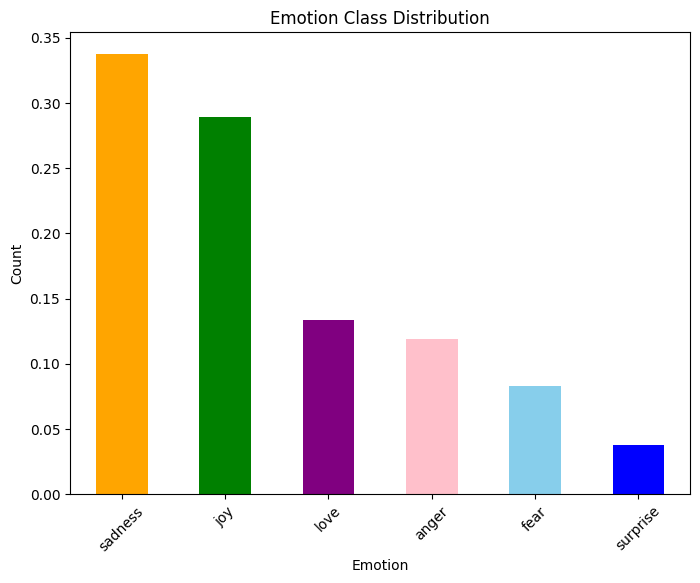

The dataset is imbalanced.


In [ ]:
# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Count occurrences of each class
class_counts = df['label'].value_counts()

# Calculate class proportions
total_samples = len(df)
class_proportions = class_counts / total_samples
colors=['orange','green','purple','pink','skyblue','blue']
# Plot class distribution
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='bar', color=colors)
plt.title('Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=45)
plt.show()

# Check for class imbalance
is_imbalanced = class_proportions.std() > 0.05  # Adjust threshold as needed
if is_imbalanced:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


**TF**-**IDF**
*   We preprocess the text data using TF-IDF vectorization to convert it into numerical features (X_tfidf).

*   We initialize the SMOTE object and apply it to the TF-IDF transformed features along with the class labels (data['label']) to generate synthetic samples.



**SMOTE**
*  SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a powerful technique used in the field of imbalanced classification to address the issue of class imbalance. It is primarily used to balance class distribution by oversampling the minority class and can also be adapted for undersampling the majority class.

In [34]:
# Step 1: Preprocess text data and convert it into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_text = df['text']
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Step 2: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to generate synthetic samples only for minority classes
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df['label'])

# Now you can use the resampled data (X_resampled and y_resampled) for training your model

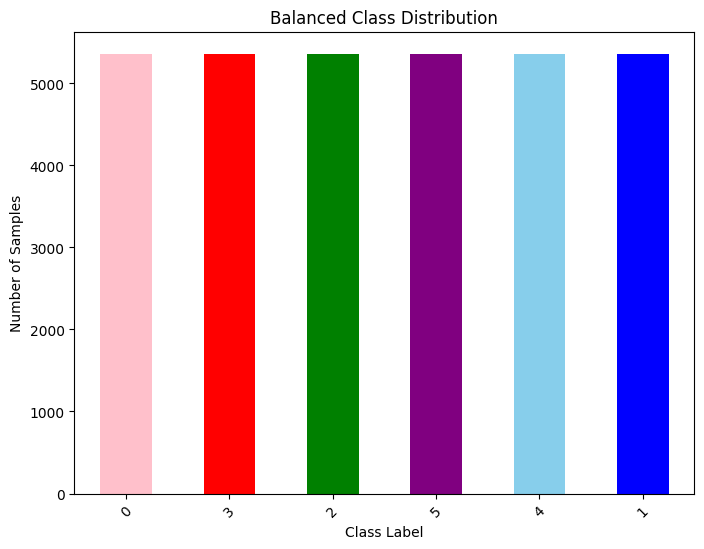

In [35]:
# Assuming you have obtained the resampled data (X_resampled and y_resampled) after applying SMOTE

# Count occurrences of each class in the resampled dataset
class_counts = pd.Series(y_resampled).value_counts()
colors = ['pink', 'red', 'green', 'purple','skyblue','blue']
# Plot class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('Balanced Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

Now, the class is balanced

**Data Preprocessing**







Data preprocessing is a crucial step in the data analysis and machine learning pipeline as it can significantly impact the performance and reliability of downstream analyses and models. Properly preprocessing data can help improve model accuracy, reduce overfitting, and ensure that the resulting insights are accurate and reliable.
*   Lower Case
*   Remove Links
*   Remove next lines(\n)
*   Words containing numbers
*   Extra Spaces
*   Special Characters
*   Removal of stop words
*   Stemming
*   Lemmatization



**1.   Lower Case**



In [ ]:
#Lower Case
df['text']=df['text'].str.lower()

**2**. **Remove Links**

In [ ]:
#Remove Links
def remove_links(text):
    p=r'https?://\S+'
    return re.sub(p,'',text)
df['text']=df['text'].apply(remove_links)

**3. Remove next lines(\n)**

In [ ]:
#removing next lines
def remove_next_lines(text):
    return text.replace('/n','')
df['text']=df['text'].apply(remove_next_lines)

**4. Words containing numbers**

In [ ]:
#removing words with numbers
def remove_words_with_numbers(text):
  return ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))
df['text'] = df['text'].apply(remove_words_with_numbers)

**5. Extra Spaces**

In [ ]:
#remove extraspaces
def remove_extraspaces(text):
    p=r'\s+'
    return re.sub(p,'',text)
df['text']=df['text'].apply(remove_extraspaces)

**6. Special Characters**

In [ ]:
#removing special characters
def remove_special_char(text):
    p=r'^\w\s+'
    return re.sub(p,'',text)
df['text']=df['text'].apply(remove_special_char)

**7. Removal of stop words**

In [ ]:
#removing stop words
stop_words = stopwords.words('english')
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)
df['text'] = df['text'].apply(remove_stopwords)

**8. Stemming**

In [ ]:
#stemming
stemmer = PorterStemmer()
def stem_words(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
df['text'] = df['text'].apply(stem_words)

**9. Lemmatization**

In [ ]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df['text'] = df['text'].apply(lemmatize_words)
df.head(5)

,text,label
0,ididntfeelhumili,0.0
1,icangofromfeelingsohopelesstosodamnedhopefulju...,0.0
2,imgrabbingaminutetopostifeelgreedywrong,3.0
3,iameverfeelingnostalgicaboutthefireplaceiwillk...,2.0
4,iamfeelinggrouchi,3.0


After Preprocessing the number of words in the text column is reduced to 16k

In [ ]:
word_count = df['text'].str.split().apply(len).sum()
print("Total number of words in the column:", word_count)
df.shape

Total number of words in the column: 16000


(16000, 2)

Dividing the dataset in to
*   Training-70%
*   Testing-20%
*   Validation-10%



In [38]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['label']
# Assuming your preprocessed data is in X (features) and y (labels) format

# Splitting into training (70%) and temporary (30%)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the temporary set into testing (20%) and validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.2, random_state=42)

# Now you have X_train, y_train (70%), X_test, y_test (20%), and X_val, y_val (10%)

# Print the shapes of the resulting sets
print("Training set shape:", X_train_temp.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (11200,)
Validation set shape: (960,)
Testing set shape: (3840,)


**Classification** **Models**





A classification model is used to predict categorical labels or classes based on input features. It is a fundamental tool in supervised learning, where the model learns patterns from labeled data to make predictions on new, unseen instances.

**SVM** (Support Vector Machine)

Support Vector Machines (SVMs) are a class of supervised learning models that excel in both linear and nonlinear classification tasks. The fundamental principle behind SVMs is to find the optimal hyperplane that best separates different classes in the feature space.

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels and parameters

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)
# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the performance on the test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))


Test Set Performance:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1087
           1       0.87      0.86      0.86      1078
           2       0.92      0.97      0.94      1059
           3       0.89      0.91      0.90      1057
           4       0.93      0.85      0.89      1081
           5       0.92      0.98      0.95      1073

    accuracy                           0.91      6435
   macro avg       0.91      0.91      0.91      6435
weighted avg       0.91      0.91      0.91      6435



In [ ]:
# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)

# Evaluate the performance on the training set
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3736
           1       0.89      0.88      0.88      3770
           2       0.92      0.97      0.95      3773
           3       0.93      0.91      0.92      3773
           4       0.94      0.88      0.91      3748
           5       0.93      0.99      0.96      3719

    accuracy                           0.92     22519
   macro avg       0.92      0.92      0.92     22519
weighted avg       0.92      0.92      0.92     22519



In [ ]:
# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Function to plot confusion matrix with emotion labels
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

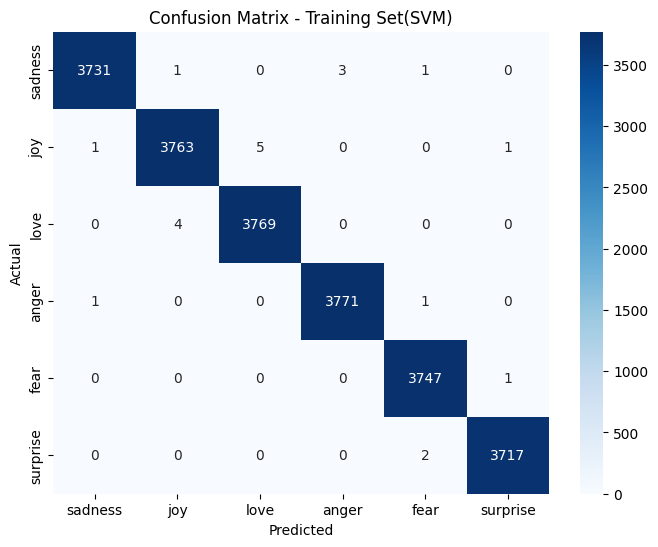

In [ ]:
# Plot confusion matrix for training set
plot_confusion_matrix(y_train, y_train_pred, title='Confusion Matrix - Training Set(SVM)')

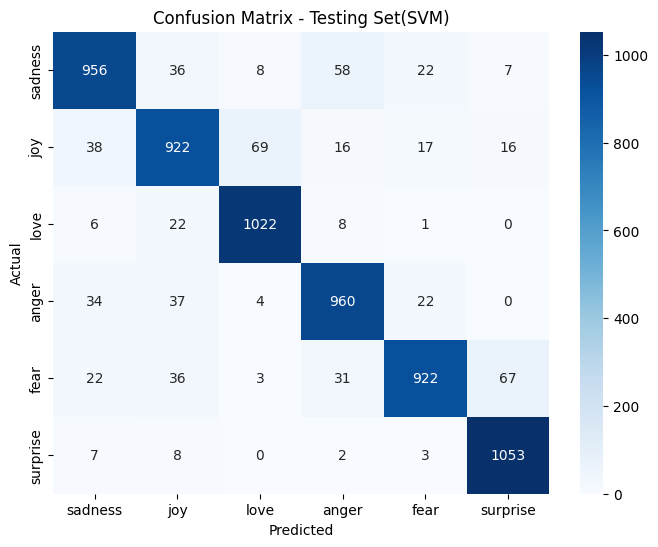

In [ ]:
# Plot confusion matrix for testing set
plot_confusion_matrix(y_test, y_test_pred, title='Confusion Matrix - Testing Set(SVM)')

In [ ]:
# Make predictions on the training set with SVM
y_train_pred_svm = svm_classifier.predict(X_train)

# Make predictions on the testing set with SVM
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for training set with SVM
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("Accuracy on Training Set with SVM:", accuracy_train_svm)

# Calculate accuracy for testing set with SVM
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print("Accuracy on Testing Set with SVM:", accuracy_test_svm)

Accuracy on Training Set with SVM: 0.921710555530885
Accuracy on Testing Set with SVM: 0.9067599067599068


**Naive Bayes**

 Naive Bayes is a probabilistic classifier that applies Bayes' theorem with strong independence assumptions between the features. It is called "naive" because it assumes that the presence of a particular feature in a class is independent of the presence of other features, which may not always hold true in real-world data.

In [ ]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Define the classifier (Naive Bayes)
classifier_nb = GaussianNB()

# Train the classifier on the balanced training data
classifier_nb.fit(X_train_dense, y_train)

# Make predictions on the balanced training data
y_train_pred_nb = classifier_nb.predict(X_train_dense)

# Make predictions on the balanced testing data
y_test_pred_nb = classifier_nb.predict(X_test_dense)

In [ ]:
# Print classification report for training set
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_nb))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.77      3736
           1       0.96      0.59      0.73      3770
           2       0.75      0.94      0.83      3773
           3       0.89      0.76      0.82      3773
           4       0.83      0.74      0.78      3748
           5       0.58      1.00      0.73      3719

    accuracy                           0.78     22519
   macro avg       0.83      0.78      0.78     22519
weighted avg       0.83      0.78      0.78     22519



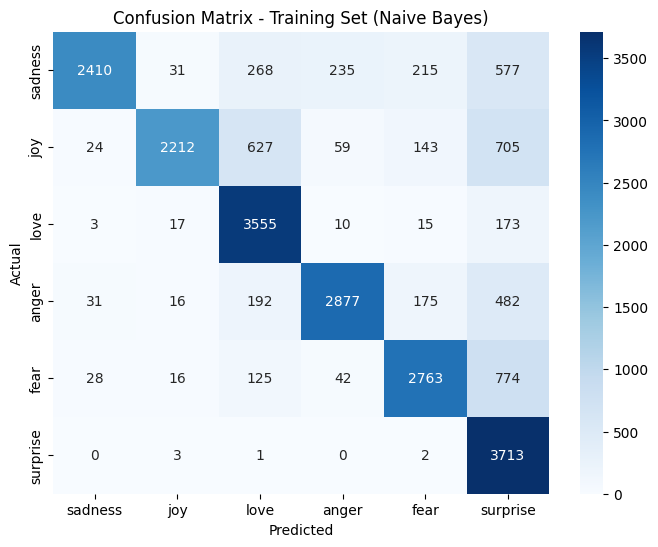

In [ ]:
# Plot confusion matrix for training set
plot_confusion_matrix(y_train, y_train_pred_nb, title='Confusion Matrix - Training Set (Naive Bayes)')

In [ ]:
# Print classification report for testing set
print("Testing Set Classification Report:")
print(classification_report(y_test, y_test_pred_nb))

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.75      1087
           1       0.94      0.60      0.74      1078
           2       0.74      0.94      0.83      1059
           3       0.85      0.75      0.80      1057
           4       0.82      0.69      0.75      1081
           5       0.57      0.99      0.73      1073

    accuracy                           0.76      6435
   macro avg       0.81      0.77      0.76      6435
weighted avg       0.81      0.76      0.76      6435



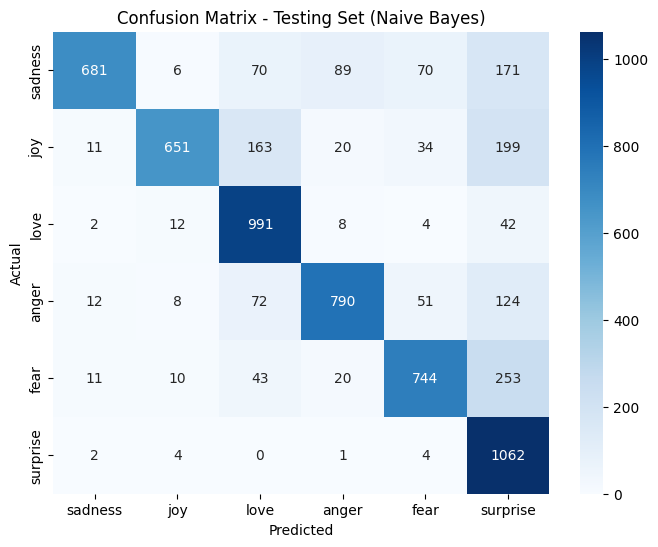

In [ ]:
# Plot confusion matrix for testing set
plot_confusion_matrix(y_test, y_test_pred_nb, title='Confusion Matrix - Testing Set (Naive Bayes)')

In [ ]:
# Calculate accuracy for training set
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
print("Accuracy on Training Set (Naive Bayes):", accuracy_train_nb)

# Calculate accuracy for testing set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
print("Accuracy on Testing Set (Naive Bayes):", accuracy_test_nb)

Accuracy on Training Set (Naive Bayes): 0.7784537501665261
Accuracy on Testing Set (Naive Bayes): 0.7644133644133644
